# Part 1: Assess grade differences between male and female students in an Informatics course


In [114]:
# Set up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load data
grades = pd.read_csv("./grades.csv")

## How many students are there of each sex?

In [115]:
print("There are " + str(len(grades[grades.sex=='f'])) + " sfemale students and " + str(len(grades[grades.sex=='m'])) + " male studnets")
grades.groupby("sex").count()

There are 21 sfemale students and 17 male studnets


,student_number,a1,a2,a3,a4,a5,a6,a7,a8,participation,total
sex,,,,,,,,,,,
f,21,21,21,21,21,21,21,21,21,21,21
m,17,17,17,17,17,17,17,17,17,17,17


## Calculate averages for each assignment for each sex 

In [116]:
by_sex = grades.groupby("sex").mean()
by_sex


,student_number,a1,a2,a3,a4,a5,a6,a7,a8,participation,total
sex,,,,,,,,,,,
f,18.666667,49.333333,93.190476,92.238095,133.095238,137.095238,46.761905,95.380952,92.52381,10.238095,92.655714
m,20.529412,48.529412,93.764706,96.647059,139.058824,133.411765,48.352941,98.117647,91.00000,8.705882,92.357647


## Create a scatter plot showing the average female score (x) v.s. male score (y)
Add a 45 degree line to the graph.

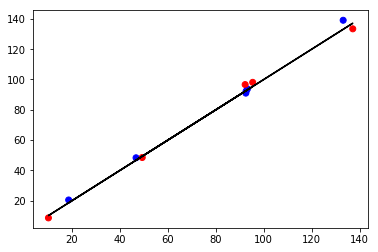

In [117]:
x = by_sex.loc['f',:]
y = by_sex.loc['m',:]
plt.scatter(x, y, c=['blue','red'])
plt.plot(x,x,'k-')


## Perform a T test on the "total" grade.

In [118]:
female_tot = grades[grades.sex=="f"].total
male_tot = grades[grades.sex=="m"].total

stats.ttest_ind(female_tot, male_tot)

Ttest_indResult(statistic=0.19492497034940412, pvalue=0.8465476263000684)

Is there an observed and significant different by sex?

**Answer:**
No there is no observed and significant different by sex becasue the p-value is 0.8465 which is too high value to have statistical confidence.

## Now run a t-test on each assignment (feel free to use a loop)

In [119]:
female = grades[grades.sex=='f']
male = grades[grades.sex=='m']

p_values = []

for i in range(7):
    p_values.append(stats.ttest_ind(female.iloc[:,i+2], male.iloc[:,i+2]))

p_values

[Ttest_indResult(statistic=1.1376008164819325, pvalue=0.2628022024404177),
 Ttest_indResult(statistic=-0.20645988932942244, pvalue=0.8375949550202038),
 Ttest_indResult(statistic=-1.9644208983837685, pvalue=0.05723714972234774),
 Ttest_indResult(statistic=-1.1222309733286793, pvalue=0.26919361006428205),
 Ttest_indResult(statistic=0.7694887702237516, pvalue=0.4466229638100365),
 Ttest_indResult(statistic=-0.7917668537263959, pvalue=0.4336828959854673),
 Ttest_indResult(statistic=-1.1280156775780423, pvalue=0.2667751621823319)]

Were there any assignments with an observed difference in male and female grades?

**Answer:**
No, none of the assignments had a p-value that indicates 95% statistical significance. 

## Visualizing differences in performance

For the assignment with the most significant difference in performance (which may or may not be statistically significant), create an overlapping histogram showing the distribution of male and female grades. 
Use these histograms to interpret why the differences were most noticable.

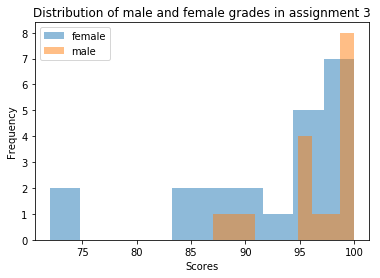

In [120]:
x_values = female.iloc[:,4]
y_values = male.iloc[:,4]

#bins = np.linspace(-10, 10, 100)

plt.hist(x_values, alpha=0.5, label='female')
plt.hist(y_values, alpha=0.5, label='male')
plt.legend(loc='upper left')
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of male and female grades in assignment 3")
plt.show()

## Comparing difficult of assignments

We can use similar techniques to make comparisons across assignments (*not* by sex). 


As an example, use a t-test to answer the question, "Was assignment 4 harder than assignment 5?"
Make sure to account for the fact that the data is *paired*.


Create a graphic that supports this comparison.

In [121]:
assignment_4 = grades.iloc[:,5]
assignment_5 = grades.iloc[:,6]
p = stats.ttest_rel(assignment_4, assignment_5)

print("We cannot reject the null hypothesis that assignment 4 and 5 were equally difficult because the p-value is 0.919 and it is not statistically significant to reject null hypothesis.")

We cannot reject the null hypothesis that assignment 4 and 5 were equally difficult because the p-value is 0.919 and it is not statistically significant to reject null hypothesis.


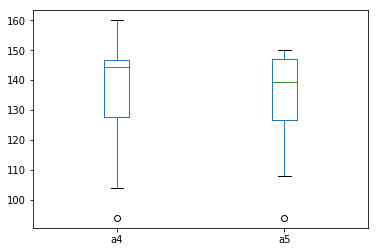

In [122]:
grades[['a4', 'a5']].plot(kind='box')
plt.savefig('boxplot.png')

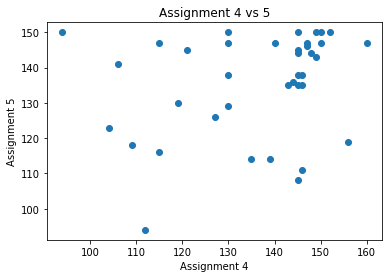

In [123]:
#plt.his(assignment_4, alpha=0.4, label="Assignment 4")
#plt.his(assignment_5, alpha=0.4, label="Assignment 5")
plt.scatter(assignment_4, assignment_5)
plt.xlabel("Assignment 4")
plt.ylabel("Assignment 5")
plt.title("Assignment 4 vs 5")
plt.savefig('scatter.png')